In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

#### Data Loading

In [2]:
van_raw = pd.read_csv('datasets_full/Vancouver/vancouver_turism_indicators.csv', thousands=',')  # Vancouver, Canada, 2010
london_raw = pd.read_csv('datasets_full/London/london_taxpayer_income.csv') # London, UK, 2012brazil_raw = pd.read_csv('datasets_full/Rio/brazil_monthly_income.csv')     # Rio, Brazil, 2016
brazil_raw = pd.read_csv('datasets_full/Rio/brazil_monthly_income.csv')  # Vancouver, Canada, 2010


In [3]:
display(van_raw.head())
display(london_raw.head())
display(brazil_raw)

,year,revenue,GDP,real_GDP,implicit_price_index,employment,wages_and_salaries,consumption_taxes,employment_vcm,employment_vi,employment_to,employment_nbc,employment_bcr,employment_ccc
0,2000,9350,4679,5085,91.4,96.7,2801,855,60600,15300,9500,5400,3900,2000
1,2001,9448,4857,5102,94.6,104.2,2968,861,67300,15700,9300,5400,4500,2100
2,2002,9754,4931,5147,95.2,104.2,2927,943,64800,17700,10400,5300,4200,1800
3,2003,9721,4703,4911,95.2,105.8,2945,989,67200,16400,11300,5100,4000,1800
4,2004,10595,5134,5195,98.4,107.6,3128,1047,67100,19100,11000,5200,3200,2000


,year,area_code,area,population,mean_income,median_income
0,1999-2000,00AA,City of London,10000,109800,40400
1,2000-2001,00AA,City of London,10000,137000,65000
2,2001-2002,00AA,City of London,12000,92900,38300
3,2002-2003,00AA,City of London,11000,78700,37000
4,2003-2004,00AA,City of London,10000,85800,39200


,year,quarter,job_type,state,value
0,2012,Q1,Directors and managers,Rondônia,2232.0
1,2012,Q1,Directors and managers,Acre,3048.0
2,2012,Q1,Directors and managers,Amazonas,3787.0
3,2012,Q1,Directors and managers,Roraima,3450.0
4,2012,Q1,Directors and managers,Pará,2455.0
...,...,...,...,...,...
9796,2020,Q1,Ill-defined occupations,Rio Grande do Sul,NaN
9797,2020,Q1,Ill-defined occupations,Mato Grosso do Sul,1500.0
9798,2020,Q1,Ill-defined occupations,Mato Grosso,NaN
9799,2020,Q1,Ill-defined occupations,Goiás,1000.0


#### Data Preprocessing

In [4]:
van = van_raw.set_index('year')
van.index = van.index.astype('int')

try:
    london_raw['year'] = [s.split('-')[1] for s in london_raw['year']]
except:
    pass
london = london_raw.set_index('year')
london.index = london.index.astype('int')

brazil = brazil_raw.set_index('year')
brazil.index = brazil.index.astype('int')

#### Exploratory Data Analysis

#### Vancouver
- Total income (in Millions of CAD) since 2000

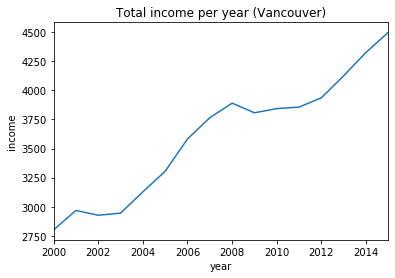

In [5]:
# Vancouver: Total income (in Millions of CAD) since 2000
fig, ax = plt.subplots()
van.loc[:, 'wages_and_salaries'].astype(float).plot(ax=ax);
ax.set_ylabel('income');
ax.set_title('Total income per year (Vancouver)');

#### London
- Mean and median income by area since 2000
- Total income by area since 2000
- Total income for the whole city since 2000
- Low income population percentage by area (*TODO*)

mean_income                                                     \
area Barking and Dagenham Barnet Bexley  Brent Bromley Camden City of London   
year                                                                           
2000                16200  26800  20500  20000   25100  39000         109800   
2001                18100  30800  19800  22200   26400  40000         137000   
2002                18600  30400  22000  21100   27400  42800          92900   
2003                19100  32300  21500  21700   27700  43000          78700   
2004                18800  33900  21900  22500   29200  45700          85800   

                                   ... median_income                       \
area Croydon Ealing East Midlands  ...     Southwark Sutton Tower Hamlets   
year                               ...                                      
2000   21500  22800         18000  ...         14600  16400         14200   
2001   22100  23800         18200  ...         15400  17000         16500   
2002   23500  25200         19200  ...         16900  17600         19100   
2003   23400  25400         19800  ...         17900  17800         19300   
2004   23300  26100         20100  ...         18200  18400         18300   

                                                                    \
area United Kingdom  Wales Waltham Forest Wandsworth West Midlands   
year                                                                 
2000          14400  13400          15000      18100         13800   
2001          14800  13100          15100      21000         14300   
2002          15500  14400          16600      21700         14800   
2003          15800  14400          17200      22000         15300   
2004          16000  14600          16800      22600         15400   

                                           
area Westminster Yorkshire and The Humber  
year                                       
2000       17300                    13400  
2001       23000                    13600  
2002       21900                    14600  
2003       22800                    14600  
2004       23500                    15100  

[5 rows x 94 columns]

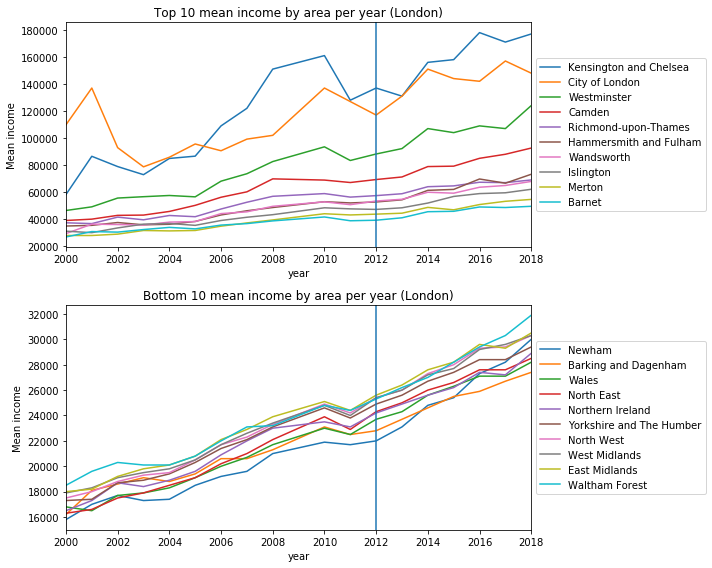

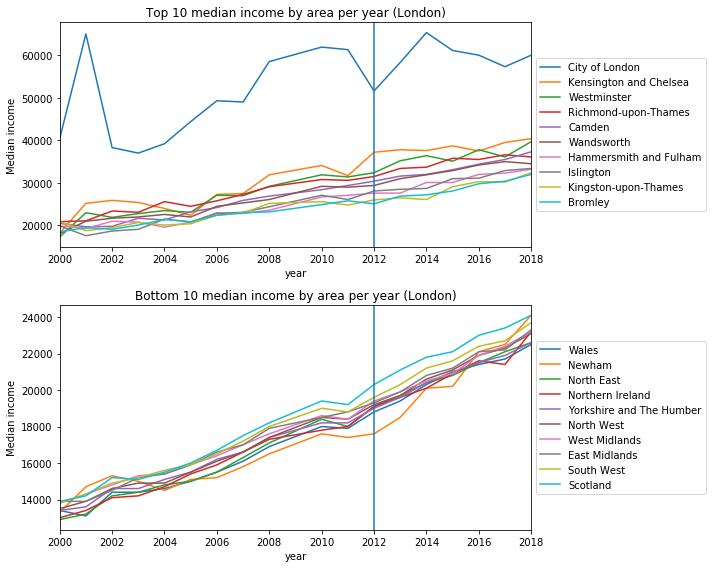

In [6]:
# London: Mean and median income by area since 2000
# mean by area
income_by_area = pd.pivot_table(london, index=london.index,  
                                values=['mean_income', 'median_income'], columns='area')
display(income_by_area.head())

# Average of mean_income over years
mean_top10 = income_by_area['mean_income'].mean().sort_values(ascending=False)[:10].index # top 10 area
mean_bottom10 = income_by_area['mean_income'].mean().sort_values()[:10].index
# print(mean_top10)
# print(mean_bottom10)

# Average of median_income over years
median_top10 = income_by_area['median_income'].mean().sort_values(ascending=False)[:10].index # top 10 area
median_bottom10 = income_by_area['median_income'].mean().sort_values()[:10].index
# print(median_top10)
# print(median_bottom10)

# plots of top10 and bottom10 mean_income_by_area
fig, axes = plt.subplots(2, 1, figsize=(10,8))
income_by_area['mean_income'].loc[:, mean_top10.values].plot(ax=axes[0])
axes[0].axvline(x=2012)
axes[0].set_ylabel('Mean income')
axes[0].set_title('Top 10 mean income by area per year (London)')
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5));

income_by_area['mean_income'].loc[:, mean_bottom10.values].plot(ax=axes[1]);
axes[1].axvline(x=2012)
axes[1].set_ylabel('Mean income')
axes[1].set_title('Bottom 10 mean income by area per year (London)')
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.tight_layout()

# plot of top10 and bottom10 median_income_by_area
fig, axes = plt.subplots(2, 1, figsize=(10,8))
income_by_area['median_income'].loc[:, median_top10.values].plot(ax=axes[0])
axes[0].axvline(x=2012)
axes[0].set_ylabel('Median income')
axes[0].set_title('Top 10 median income by area per year (London)')
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5));

income_by_area['median_income'].loc[:, median_bottom10.values].plot(ax=axes[1]);
axes[1].axvline(x=2012)
axes[1].set_ylabel('Median income')
axes[1].set_title('Bottom 10 median income by area per year (London)')
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.tight_layout()

In [7]:
df_imbalanced_income = (income_by_area['mean_income'] - income_by_area['median_income']) / income_by_area['mean_income'] 
# df_imbalanced_income.head()
# df_imbalanced_income.loc[2010].sort_values(ascending=False)

In [8]:
# df_imbalanced_income.loc[[2011, 2012, 2013, 2015, 2018], :].sort_values(.plot.barh()

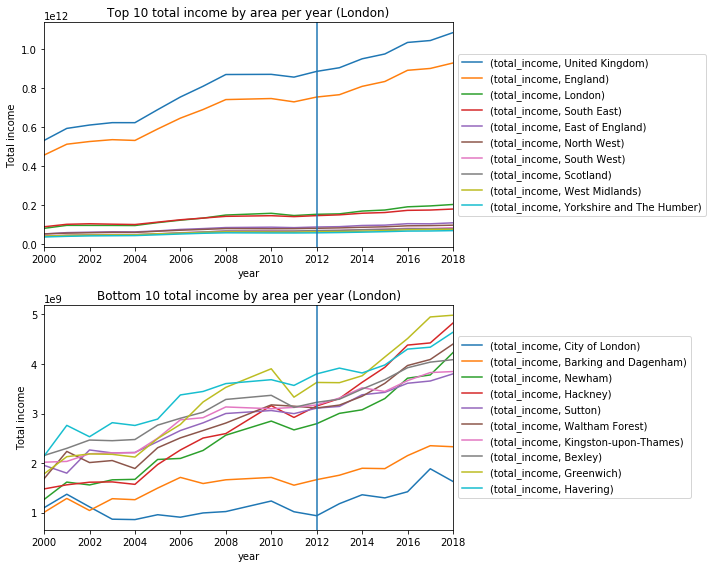

In [9]:
# London: Total income by area since 2000
london['total_income'] = london['mean_income'] * london['population'] 

total_income_by_area = pd.pivot_table(london, index=london.index,  
                                      values=['total_income'], columns='area')

total_top10 = total_income_by_area.mean().sort_values(ascending=False)[:10].index # top 10 area
total_bottom10 = total_income_by_area.mean().sort_values()[:10].index
# display(total_income_by_area.mean().sort_values(ascending=False))

fig, axes = plt.subplots(2, 1, figsize=(10,8))
total_income_by_area.loc[:, total_top10.values].plot(ax=axes[0])
axes[0].axvline(x=2012)
axes[0].set_ylabel('Total income')
axes[0].set_title('Top 10 total income by area per year (London)')
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5));

total_income_by_area.loc[:, total_bottom10.values].plot(ax=axes[1]);
axes[1].axvline(x=2012)
axes[1].set_ylabel('Total income')
axes[1].set_title('Bottom 10 total income by area per year (London)')
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.tight_layout()

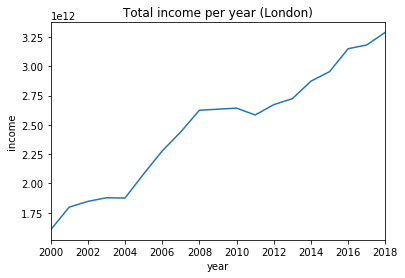

In [10]:
# London: Total income since 2000
fig, ax = plt.subplots()
total_income = london['total_income'].groupby(london.index).sum()
total_income.plot(ax=ax)
ax.set_ylabel('income');
ax.set_title('Total income per year (London)');

#### Brazil
- Average income for main job by state
- Total income for main job by state
- Total_income (cannot compute, data not enough, don't know the population for each job)

In [11]:
display(brazil)
print(len(brazil.loc[brazil['job_type']=='Directors and managers', 'state']))
print(len(brazil.loc[brazil['job_type']=='Directors and managers', 'state'].unique()))
display(brazil.loc[(brazil['job_type']=='Administrative support workers') & (brazil['state']=='Acre')].head())

,quarter,job_type,state,value
year,,,,
2012,Q1,Directors and managers,Rondônia,2232.0
2012,Q1,Directors and managers,Acre,3048.0
2012,Q1,Directors and managers,Amazonas,3787.0
2012,Q1,Directors and managers,Roraima,3450.0
2012,Q1,Directors and managers,Pará,2455.0
...,...,...,...,...
2020,Q1,Ill-defined occupations,Rio Grande do Sul,NaN
2020,Q1,Ill-defined occupations,Mato Grosso do Sul,1500.0
2020,Q1,Ill-defined occupations,Mato Grosso,NaN


891
27


,quarter,job_type,state,value
year,,,,
2012,Q1,Administrative support workers,Acre,1155.0
2012,Q2,Administrative support workers,Acre,1253.0
2012,Q3,Administrative support workers,Acre,1389.0
2012,Q4,Administrative support workers,Acre,1426.0
2013,Q1,Administrative support workers,Acre,1370.0


In [12]:
# Average income for main job by state for years
# brazil.groupby([brazil.index, 'state']).sum()